#  **<font color='blue'><b>ECSP5004 Machine Learning Project</b></font>**


## **Importing The Libraries**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import seaborn as sns
%matplotlib inline

In [32]:
df=pd.read_csv("/content/health_lifestyle_dataset.csv")
df.head()

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0


## **Visualizing The Data**

In [33]:
display(df.shape)
display(df.size)

(100000, 16)

1600000

In [34]:
display(df.info())
display(df.describe())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   age                100000 non-null  int64  
 2   gender             100000 non-null  object 
 3   bmi                100000 non-null  float64
 4   daily_steps        100000 non-null  int64  
 5   sleep_hours        100000 non-null  float64
 6   water_intake_l     100000 non-null  float64
 7   calories_consumed  100000 non-null  int64  
 8   smoker             100000 non-null  int64  
 9   alcohol            100000 non-null  int64  
 10  resting_hr         100000 non-null  int64  
 11  systolic_bp        100000 non-null  int64  
 12  diastolic_bp       100000 non-null  int64  
 13  cholesterol        100000 non-null  int64  
 14  family_history     100000 non-null  int64  
 15  disease_risk       100000 non-null  int64  
dtypes: 

None

,id,age,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,48.525990,29.024790,10479.87029,6.491784,2.751496,2603.341200,0.200940,0.300020,74.457420,134.58063,89.508850,224.300630,0.299150,0.248210
std,28867.657797,17.886768,6.352666,5483.63236,2.021922,1.297338,807.288563,0.400705,0.458269,14.423715,25.95153,17.347041,43.327749,0.457888,0.431976
min,1.000000,18.000000,18.000000,1000.00000,3.000000,0.500000,1200.000000,0.000000,0.000000,50.000000,90.00000,60.000000,150.000000,0.000000,0.000000
25%,25000.750000,33.000000,23.500000,5729.00000,4.700000,1.600000,1906.000000,0.000000,0.000000,62.000000,112.00000,74.000000,187.000000,0.000000,0.000000
50%,50000.500000,48.000000,29.000000,10468.00000,6.500000,2.800000,2603.000000,0.000000,0.000000,74.000000,135.00000,89.000000,224.000000,0.000000,0.000000
75%,75000.250000,64.000000,34.500000,15229.00000,8.200000,3.900000,3299.000000,0.000000,1.000000,87.000000,157.00000,105.000000,262.000000,1.000000,0.000000
max,100000.000000,79.000000,40.000000,19999.00000,10.000000,5.000000,3999.000000,1.000000,1.000000,99.000000,179.00000,119.000000,299.000000,1.000000,1.000000


,0
id,0
age,0
gender,0
bmi,0
daily_steps,0
sleep_hours,0
water_intake_l,0
calories_consumed,0
smoker,0
alcohol,0


## **Visualizing Using Histogram**

<Axes: >

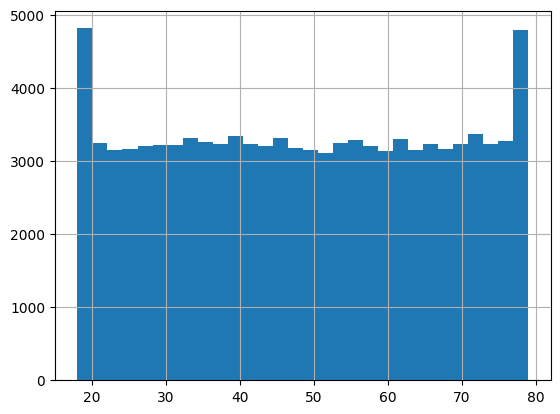

In [35]:
df['age'].hist(bins=30)

## **Setting Up The Features**

In [36]:
features = []
for col in df.columns:
    if col != 'disease_risk':
        features.append(col)
    else:
        break

X = df[features]
y = df['disease_risk']

In [37]:
display(X.head())
display(y.head())

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history
0,1,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0
1,2,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0
2,3,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0
3,4,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0
4,5,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0


,disease_risk
0,0
1,0
2,0
3,0
4,0


## **Scaling The Features**

## **Splitting Testing and Training Data**

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(80000, 15) (20000, 15)
(80000,) (20000,)


In [39]:
#Performing Data Preprocessing

In [40]:
scaler_X = MinMaxScaler()
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('id')
X_train[numerical_cols] = scaler_X.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler_X.transform(X_test[numerical_cols])
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))
display(X_train.head())
display(y_train_scaled[:5])

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history
75220,75221,0.918033,Male,0.718182,0.786989,0.371429,0.044444,0.419793,0.0,1.0,0.000000,0.876404,0.254237,0.087248,0.0
48955,48956,0.131148,Female,0.809091,0.391336,0.485714,0.977778,0.468382,0.0,0.0,0.571429,0.741573,0.050847,0.469799,1.0
44966,44967,0.016393,Female,0.568182,0.203011,0.842857,0.288889,0.177921,0.0,1.0,0.673469,0.224719,0.440678,0.114094,0.0
13568,13569,0.147541,Female,0.663636,0.778673,0.514286,0.088889,0.781708,0.0,0.0,0.224490,0.494382,0.525424,0.751678,0.0
92727,92728,0.393443,Male,0.904545,0.059635,0.642857,0.244444,0.384780,0.0,0.0,0.285714,0.460674,0.745763,0.832215,0.0


array([[0.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [18]:
#Training the Model

array([0, 0, 1, ..., 1, 1, 1])

Accuracy: 0.613
              precision    recall  f1-score   support

           0       0.75      0.72      0.74     15042
           1       0.25      0.27      0.26      4958

    accuracy                           0.61     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.63      0.61      0.62     20000



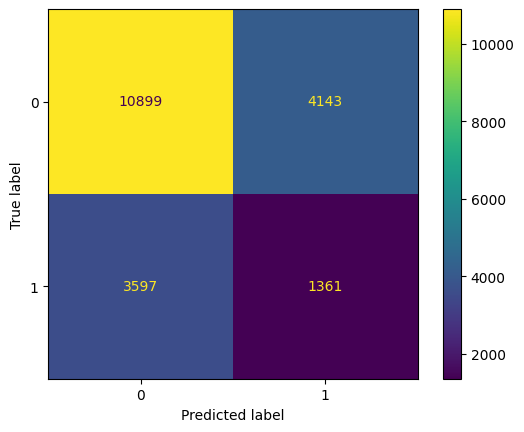

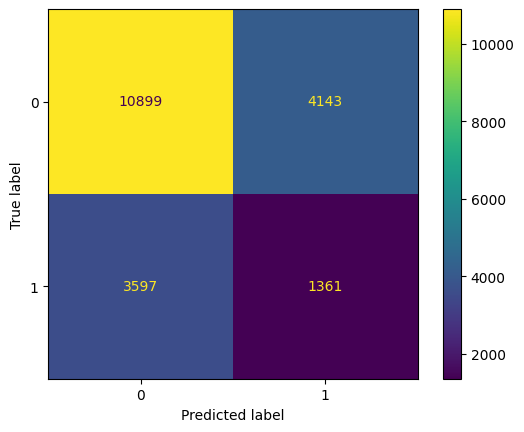

In [46]:
decision_tree_model = DecisionTreeClassifier(random_state=42) # Added random_state for reproducibility
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
display(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
Cnf=ConfusionMatrixDisplay.from_estimator(decision_tree_model,X_test,y_test)
Cnf.plot()

Accuracy: 0.7521
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     15042
           1       0.00      0.00      0.00      4958

    accuracy                           0.75     20000
   macro avg       0.38      0.50      0.43     20000
weighted avg       0.57      0.75      0.65     20000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


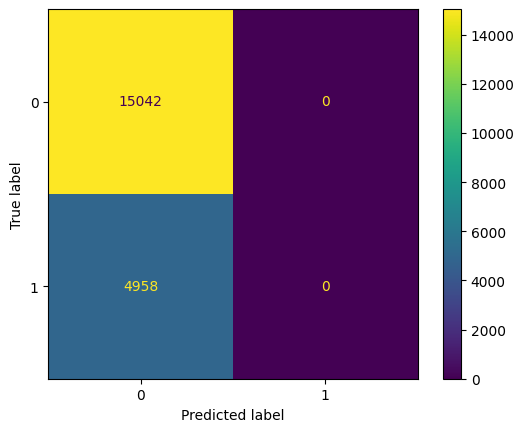

In [47]:
Random_Forest_model = RandomForestClassifier(random_state=42)
Random_Forest_model.fit(X_train, y_train)
y_pred = Random_Forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(Random_Forest_model, X_test, y_test)
plt.show()

In [48]:
# Compare accuracy of Decision Tree and Random Forest models
dt_accuracy = accuracy_score(y_test, decision_tree_model.predict(X_test))
rf_accuracy = accuracy_score(y_test, Random_Forest_model.predict(X_test))

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Determine the best model based on accuracy
if rf_accuracy > dt_accuracy:
    print("\nRandom Forest Model performed better based on accuracy.")
elif dt_accuracy > rf_accuracy:
    print("\nDecision Tree Model performed better based on accuracy.")
else:
    print("\nBoth models have the same accuracy.")

Decision Tree Accuracy: 0.6130
Random Forest Accuracy: 0.7521

Random Forest Model performed better based on accuracy.


In [52]:
# Apply the same preprocessing steps to the entire dataset X
X_processed = X.copy()
# Handle categorical features ('gender') using one-hot encoding
X_processed = pd.get_dummies(X_processed, columns=['gender'], drop_first=True)
if 'gender' in X_processed.columns:
    X_processed = X_processed.drop('gender', axis=1)
numerical_cols_processed = X_processed.select_dtypes(include=np.number).columns.tolist()
if 'id' in numerical_cols_processed:
  numerical_cols_processed.remove('id')
X_processed[numerical_cols_processed] = scaler_X.transform(X_processed[numerical_cols_processed])
X_processed = X_processed.reindex(columns=X_train.columns, fill_value=0)
all_predictions = Random_Forest_model.predict(X_processed)
display(all_predictions)

array([0, 0, 0, ..., 0, 0, 0])